# Distinguish author-specific patterns in music

_

## Environment and data

_

In [1]:
# Standard library imports
import random

# Related third party imports
import numpy as np

# Local application/library specific imports
import nnlibs.initialize
from nnlibs.commons.maths import relu, softmax
from nnlibs.commons.library import (
    configure_directory,
    read_model,
)
from nnlibs.network.models import EpyNN
from nnlibs.embedding.models import Embedding
from nnlibs.rnn.models import RNN
# from nnlibs.lstm.models import LSTM
from nnlibs.gru.models import GRU
from nnlibs.flatten.models import Flatten
from nnlibs.dropout.models import Dropout
from nnlibs.dense.models import Dense
from prepare_dataset import prepare_dataset
from settings import se_hPars


########################## CONFIGURE ##########################
random.seed(1)

np.set_printoptions(threshold=10)

np.seterr(all='warn')
np.seterr(under='ignore')


############################ DATASET ##########################
X_features, Y_label = prepare_dataset(N_SAMPLES=1280)

_

## Feed-Forward (FF)

_

### Embedding

_

In [2]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      X_encode=True,
                      Y_encode=True,
                      batch_size=32,
                      relative_size=(2, 1, 0))

_

### Multiple layers with Dropout

_

In [3]:
name = 'Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax'

se_hPars['learning_rate'] = 0.005
se_hPars['softmax_temperature'] = 5

flatten = Flatten()

hidden_dense = Dense(64, relu)

dropout2 = Dropout(keep_prob=0.8)

dense = Dense(2, softmax)

layers = [embedding, flatten, hidden_dense, dropout2, dense]

model = EpyNN(layers=layers, name=name)

_

In [4]:
model.initialize(loss='BCE', seed=1, metrics=['accuracy', 'recall'], se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: Flatten
compute_shapes: Flatten
initialize_parameters: Flatten
forward: Flatten
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Flatten
backward: Flatten
compute_gradients: Flatten
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [5]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+-------+----------+-------+--------+-------+-------+-------------------------------------------------------------+
| epoch |  lrate   |  lrate   |       | accuracy |       | recall |       |  BCE  |                         Experiment                          |
|       |  Dense   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)   |  (0)  |  (1)  |                                                             |
+-------+----------+----------+-------+----------+-------+--------+-------+-------+-------------------------------------------------------------+
|   0   | 5.00e-03 | 5.00e-03 | 0.698 |  0.625   | 0.872 | 0.822  | 0.581 | 0.632 | 1628624721_Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax |
|  10   | 5.00e-03 | 5.00e-03 | 0.940 |  0.693   | 0.978 | 0.802  | 0.204 | 0.625 | 1628624721_Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax |
|  20   | 5.00e-03 | 5.00e-03 | 0.975 |  0.714   | 0.992 | 0.806  | 0.113 | 0.676 | 1628624721_Flatten_Dense-64-relu_Dropout

_

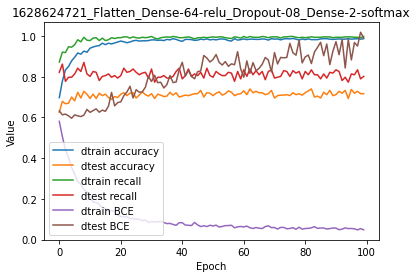

In [6]:
model.plot(path=False)

## Recurrent Architectures

_

### Embedding

_

In [7]:
embedding = Embedding(X_data=X_features,
                      Y_data=Y_label,
                      X_encode=True,
                      Y_encode=True,
                      batch_size=32,
                      relative_size=(2, 1, 0))

_

### RNN + Multi-layers FF with Dropout

_

In [8]:
name = 'RNN-100_Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax'

se_hPars['learning_rate'] = 0.005
se_hPars['softmax_temperature'] = 5

rnn = RNN(100)

hidden_dense = Dense(64, relu)

dropout2 = Dropout(keep_prob=0.8)

dense = Dense(2, softmax)

layers = [embedding, rnn, hidden_dense, dropout2, dense]

model = EpyNN(layers=layers, name=name)

_

In [9]:
model.initialize(loss='BCE', seed=1, metrics=['accuracy', 'recall'], se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: RNN
compute_shapes: RNN
initialize_parameters: RNN
forward: RNN
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: RNN
backward: RNN
compute_gradients: RNN
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [10]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+----------+-------+----------+-------+--------+-------+-------+---------------------------------------------------------------------+
| epoch |  lrate   |  lrate   |  lrate   |       | accuracy |       | recall |       |  BCE  |                             Experiment                              |
|       |   RNN    |  Dense   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)   |  (0)  |  (1)  |                                                                     |
+-------+----------+----------+----------+-------+----------+-------+--------+-------+-------+---------------------------------------------------------------------+
|   0   | 5.00e-03 | 5.00e-03 | 5.00e-03 | 0.590 |  0.583   | 0.884 | 0.883  | 0.664 | 0.669 | 1628624729_RNN-100_Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax |
|  10   | 5.00e-03 | 5.00e-03 | 5.00e-03 | 0.694 |  0.653   | 0.807 | 0.753  | 0.598 | 0.617 | 1628624729_RNN-100_Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax |
|  20   | 

_

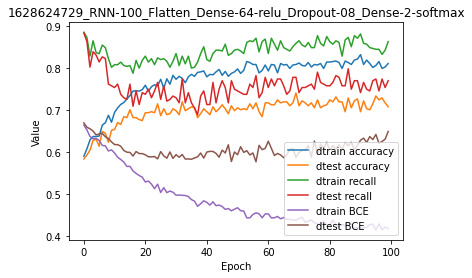

In [11]:
model.plot(path=False)

_

### GRU + Multi-layers FF with Dropout

_

In [12]:
name = 'GRU-100_Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax'

se_hPars['learning_rate'] = 0.0025
se_hPars['softmax_temperature'] = 5

rnn = GRU(100)

hidden_dense = Dense(64, relu)

dropout2 = Dropout(keep_prob=0.8)

dense = Dense(2, softmax)

layers = [embedding, rnn, hidden_dense, dropout2, dense]

model = EpyNN(layers=layers, name=name)

_

In [13]:
model.initialize(loss='BCE', seed=1, metrics=['accuracy', 'recall'], se_hPars=se_hPars.copy())

--- EpyNN Check --- 
Layer: Embedding
compute_shapes: Embedding
initialize_parameters: Embedding
forward: Embedding
Layer: GRU
compute_shapes: GRU
initialize_parameters: GRU
forward: GRU
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dropout
compute_shapes: Dropout
initialize_parameters: Dropout
forward: Dropout
Layer: Dense
compute_shapes: Dense
initialize_parameters: Dense
forward: Dense
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: Dropout
backward: Dropout
compute_gradients: Dropout
Layer: Dense
backward: Dense
compute_gradients: Dense
Layer: GRU
backward: GRU
compute_gradients: GRU
Layer: Embedding
backward: Embedding
compute_gradients: Embedding


_

In [14]:
model.train(epochs=100, init_logs=False)

+-------+----------+----------+----------+-------+----------+-------+--------+-------+-------+---------------------------------------------------------------------+
| epoch |  lrate   |  lrate   |  lrate   |       | accuracy |       | recall |       |  BCE  |                             Experiment                              |
|       |   GRU    |  Dense   |  Dense   |  (0)  |   (1)    |  (0)  |  (1)   |  (0)  |  (1)  |                                                                     |
+-------+----------+----------+----------+-------+----------+-------+--------+-------+-------+---------------------------------------------------------------------+
|   0   | 2.50e-03 | 2.50e-03 | 2.50e-03 | 0.574 |  0.574   | 0.982 | 0.980  | 0.673 | 0.672 | 1628625016_GRU-100_Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax |
|  10   | 2.50e-03 | 2.50e-03 | 2.50e-03 | 0.584 |  0.581   | 0.888 | 0.895  | 0.658 | 0.658 | 1628625016_GRU-100_Flatten_Dense-64-relu_Dropout-08_Dense-2-softmax |
|  20   | 

_

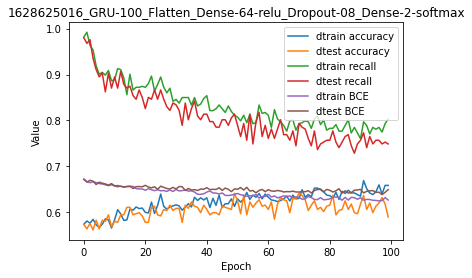

In [15]:
model.plot(path=False)